# Do a data analysis on the data on HDI.csv

In [65]:
import polars as pl
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

ModuleNotFoundError: No module named 'pandas'

# Read the data

In [66]:
dtypes = {
    "HDI Rank": "Int64",
    "Country": "str",
    "Human Development Index (HDI)": "float64",
    "Life expectancy at birth": "float64",
    "Expected years of schooling": "float64",
    "Mean years of schooling": "float64",
    "Gross national income (GNI) per capita": "Int64",
    "GNI per capita rank minus HDI rank": "Int64",
}

In [68]:
df = pl.read_csv("HDI.csv")
df

ComputeError: Could not parse `"6,603"` as dtype `i64` at column 'Internet users (% 2010 -2015)' (column number 69).
The current offset in the file is 35811 bytes.

You might want to try:
- increasing `infer_schema_length` (e.g. `infer_schema_length=10000`),
- specifying correct dtype with the `dtypes` argument
- setting `ignore_errors` to `True`,
- adding `"6,603"` to the `null_values` list.

# Check the data types

In [69]:
df.dtypes

[Int64,
 Int64,
 Utf8,
 Int64,
 Int64,
 Int64,
 Int64,
 Utf8,
 Int64,
 Int64,
 Int64,
 Int64,
 Int64,
 Int64,
 Int64,
 Int64,
 Int64,
 Int64,
 Int64,
 Int64,
 Int64,
 Int64,
 Utf8,
 Utf8,
 Int64,
 Int64,
 Int64,
 Int64,
 Utf8,
 Utf8,
 Int64,
 Int64,
 Int64,
 Int64,
 Utf8,
 Int64,
 Int64,
 Int64,
 Int64,
 Int64,
 Int64,
 Int64,
 Int64,
 Int64,
 Int64,
 Int64,
 Int64,
 Int64,
 Int64,
 Int64,
 Int64,
 Int64,
 Int64,
 Int64,
 Int64,
 Int64,
 Int64,
 Int64,
 Int64,
 Int64,
 Int64,
 Int64,
 Int64,
 Int64,
 Int64,
 Int64,
 Int64,
 Int64,
 Int64,
 Int64,
 Int64,
 Int64,
 Int64,
 Int64,
 Int64,
 Int64,
 Int64,
 Int64,
 Int64,
 Int64,
 Int64,
 Int64]

# Check the data

In [70]:
df.head(10)

,Id,Country,HDI Rank,HDI,Life expectancy,Mean years of schooling,Gross national income (GNI) per capita,GNI per capita rank minus HDI rank,Change in HDI rank 2010-2015,Average annual HDI growth 1990-2000,Average annual HDI growth 2000-2010,Average annual HDI growth 2010-2015,Average annual HDI growth 1990-2015,Gender Development Index value,Gender Development Index Group,Human Development Index (HDI) Female,Human Development Index (HDI) Male,Life expectancy at birth Female,Life expectancy at birth Male,Mean years of schooling Female,Mean years of schooling Male,Estimated gross national income per capita Female,Estimated gross national income per capita Male,Share of seats in parliament (% held by women),Population with at least some secondary education % (2005-2015) Female,Population with at least some secondary education % (2005-2015) Male,Labour force participation rate (% ages 15 and older) Female,Total Population (millions) 2015,Total Population (millions) 2030,Population Average annual growth 2000/2005 (%),Population Average annual growth 2010/2015 (%),Population Urban 2015 %,Population Under age 5 (millions) 2015,Population Ages 15–64 (millions) 2015,Population Ages 65 and older (millions) 2015,Population Median age (years) 2015,…,"Mortality rates Infant (per 1,000 live births) 2015","Mortality rates Under-five (per 1,000 live births) 2015","Mortality rates Female Adult (per 1,000 live births) 2014","Mortality rates Male Adult (per 1,000 live births) 2014","Deaths due to Malria (per 100,000 people)","Deaths due to Tuberculosis (per 100,000 people)","HIV prevalence, adult (% ages 15–49)",Life expectancy at age 59 (years) 2010/2015,"Physicians (per 10,000 people) 2001-2014",Public health expenditure (% of GDP) 2014,Employment to population ratio (% ages 15 and older),Labour force participation rate (% ages 15 and older),Employment in agriculture (% of total employment) 2010-2014,Employment in services (% of total employment) 2010- 2014,Total Unemployment (% of labour force) 2015,Unemployment Youth (% ages 15-24) 2010-2014,Unemployment Youth not in school or employment (% ages 15-24) 2010-2014,Vulnerable employment (% of total employment) 2005-2014,Child labour (% ages 5-14) 2009-2015,Working poor at PPP$3.10 a day (%) 2004-2013,Mandatory paid maternity leave (days),Old-age pension recipients (% of statutory pension age population) 2004-2013,Internet users,Internet users (% 2010 -2015),Inequality-adjusted HDI (IHDI),Inequality-adjusted HDI (IHDI) Over loss(%),Difference from HDI rank,Coefficient of human inequality,Inequality in life expectancy (%) 2010-2015,Inequality-adjusted life expectancy index,Inequality in education(%),Inequality-adjusted education index,Inequality in income (%),Inequality-adjusted income index,Income inequality (Quintile ratio) 2010-2015,Income inequality (Palma ratio) 2010-2015,Income inequality (Gini coefficient) 2010-2015
i64,i64,str,i64,i64,i64,i64,str,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,str,str,i64,i64,i64,i64,str,str,i64,i64,i64,i64,str,i64,i64,…,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64
0,1,"""Norway""",1,1,82,13,"""67,614""",5,0,1,0,0,0,1,1,1,1,84,80,13,13,"""59,800""","""75,314""",40,96,95,61,"""5""","""6""",1,1,81,0,"""3""",1,39,…,2,3,44,69,null,0,null,24,43,8,62,65,2,77,4,10,6,5,null,null,null,100,97,-1,1,5,0,5,3,1,2,1,10,1,4,1,26
1,2,"""Australia""",2,1,83,13,"""42,822""",19,1,0,0,0,0,1,1,1,1,85,81,13,13,"""34,271""","""51,386""",31,91,92,59,"""24""","""29""",1,2,89,2,"""16""",4,38,…,3,4,null,null,null,0,0,25,33,6,61,65,3,70,6,14,10,null,null,null,null,83,85,32,1,8,-1,8,4,1,2,1,18,1,6,1,35
2,3,"""Switzerland""",2,1,83,13,"""56,364""",7,0,1,0,0,0,1,2,1,1,85,81,13,14,"""46,798""","""66,116""",29,96,97,63,"""8""","""9""",1,1,74,0,"""6""",2,42,…,3,4,null,null,null,0,null,25,41,8,66,69,3,74,4,7,7,9,null,null,98,100,88,15,1,9,-4,8,4,1,6,1,16,1,5,1,32
3,4,"""Germany""",4

# Check the data

In [71]:
df.tail(10)

,Id,Country,HDI Rank,HDI,Life expectancy,Mean years of schooling,Gross national income (GNI) per capita,GNI per capita rank minus HDI rank,Change in HDI rank 2010-2015,Average annual HDI growth 1990-2000,Average annual HDI growth 2000-2010,Average annual HDI growth 2010-2015,Average annual HDI growth 1990-2015,Gender Development Index value,Gender Development Index Group,Human Development Index (HDI) Female,Human Development Index (HDI) Male,Life expectancy at birth Female,Life expectancy at birth Male,Mean years of schooling Female,Mean years of schooling Male,Estimated gross national income per capita Female,Estimated gross national income per capita Male,Share of seats in parliament (% held by women),Population with at least some secondary education % (2005-2015) Female,Population with at least some secondary education % (2005-2015) Male,Labour force participation rate (% ages 15 and older) Female,Total Population (millions) 2015,Total Population (millions) 2030,Population Average annual growth 2000/2005 (%),Population Average annual growth 2010/2015 (%),Population Urban 2015 %,Population Under age 5 (millions) 2015,Population Ages 15–64 (millions) 2015,Population Ages 65 and older (millions) 2015,Population Median age (years) 2015,…,"Mortality rates Infant (per 1,000 live births) 2015","Mortality rates Under-five (per 1,000 live births) 2015","Mortality rates Female Adult (per 1,000 live births) 2014","Mortality rates Male Adult (per 1,000 live births) 2014","Deaths due to Malria (per 100,000 people)","Deaths due to Tuberculosis (per 100,000 people)","HIV prevalence, adult (% ages 15–49)",Life expectancy at age 59 (years) 2010/2015,"Physicians (per 10,000 people) 2001-2014",Public health expenditure (% of GDP) 2014,Employment to population ratio (% ages 15 and older),Labour force participation rate (% ages 15 and older),Employment in agriculture (% of total employment) 2010-2014,Employment in services (% of total employment) 2010- 2014,Total Unemployment (% of labour force) 2015,Unemployment Youth (% ages 15-24) 2010-2014,Unemployment Youth not in school or employment (% ages 15-24) 2010-2014,Vulnerable employment (% of total employment) 2005-2014,Child labour (% ages 5-14) 2009-2015,Working poor at PPP$3.10 a day (%) 2004-2013,Mandatory paid maternity leave (days),Old-age pension recipients (% of statutory pension age population) 2004-2013,Internet users,Internet users (% 2010 -2015),Inequality-adjusted HDI (IHDI),Inequality-adjusted HDI (IHDI) Over loss(%),Difference from HDI rank,Coefficient of human inequality,Inequality in life expectancy (%) 2010-2015,Inequality-adjusted life expectancy index,Inequality in education(%),Inequality-adjusted education index,Inequality in income (%),Inequality-adjusted income index,Income inequality (Quintile ratio) 2010-2015,Income inequality (Palma ratio) 2010-2015,Income inequality (Gini coefficient) 2010-2015
i64,i64,str,i64,i64,i64,i64,str,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,str,str,i64,i64,i64,i64,str,str,i64,i64,i64,i64,str,i64,i64,…,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64
185,186,"""Chad""",186,0,52,2,"""1,991""",-19,0,null,2,1,null,1,5,0,0,53,51,1,3,"""1,581""","""2,400""",15,2,10,64,"""14""","""22""",4,3,23,3,"""7""",0,16,…,85,139,346,388,153,23,2,16,0,2,68,72,null,null,6,8,null,null,26,67,98,2,3,64,0,40,-1,40,46,0,42,0,31,0,10,2,43
186,187,"""Niger""",187,0,62,2,"""889""",1,1,2,2,2,2,1,5,0,0,63,61,1,2,"""481""","""1,292""",13,4,8,40,"""20""","""36""",4,4,19,4,"""9""",1,15,…,57,96,203,239,131,18,1,16,0,3,63,65,null,null,3,4,null,85,31,85,98,6,2,101,0,28,1,28,35,0,35,0,12,0,5,1,34
187,188,"""Central Africa…",188,0,52,4,"""587""",4,-1,0,1,0,0,1,5,0,0,53,50,3,6,"""482""","""696""",13,12,30,72,"""5""","""7""",2,2,40,1,"""3""",0,20,…,92,130,382,423,115,48,4,16,1,2,72,78,null,null,8,12,null,null,29,81,98,null,5,-9,0,44,0,43,46,0,35,0,49,0,18,5,56
188,189,"""

# Check the data

In [72]:
df.sample(10)

,Id,Country,HDI Rank,HDI,Life expectancy,Mean years of schooling,Gross national income (GNI) per capita,GNI per capita rank minus HDI rank,Change in HDI rank 2010-2015,Average annual HDI growth 1990-2000,Average annual HDI growth 2000-2010,Average annual HDI growth 2010-2015,Average annual HDI growth 1990-2015,Gender Development Index value,Gender Development Index Group,Human Development Index (HDI) Female,Human Development Index (HDI) Male,Life expectancy at birth Female,Life expectancy at birth Male,Mean years of schooling Female,Mean years of schooling Male,Estimated gross national income per capita Female,Estimated gross national income per capita Male,Share of seats in parliament (% held by women),Population with at least some secondary education % (2005-2015) Female,Population with at least some secondary education % (2005-2015) Male,Labour force participation rate (% ages 15 and older) Female,Total Population (millions) 2015,Total Population (millions) 2030,Population Average annual growth 2000/2005 (%),Population Average annual growth 2010/2015 (%),Population Urban 2015 %,Population Under age 5 (millions) 2015,Population Ages 15–64 (millions) 2015,Population Ages 65 and older (millions) 2015,Population Median age (years) 2015,…,"Mortality rates Infant (per 1,000 live births) 2015","Mortality rates Under-five (per 1,000 live births) 2015","Mortality rates Female Adult (per 1,000 live births) 2014","Mortality rates Male Adult (per 1,000 live births) 2014","Deaths due to Malria (per 100,000 people)","Deaths due to Tuberculosis (per 100,000 people)","HIV prevalence, adult (% ages 15–49)",Life expectancy at age 59 (years) 2010/2015,"Physicians (per 10,000 people) 2001-2014",Public health expenditure (% of GDP) 2014,Employment to population ratio (% ages 15 and older),Labour force participation rate (% ages 15 and older),Employment in agriculture (% of total employment) 2010-2014,Employment in services (% of total employment) 2010- 2014,Total Unemployment (% of labour force) 2015,Unemployment Youth (% ages 15-24) 2010-2014,Unemployment Youth not in school or employment (% ages 15-24) 2010-2014,Vulnerable employment (% of total employment) 2005-2014,Child labour (% ages 5-14) 2009-2015,Working poor at PPP$3.10 a day (%) 2004-2013,Mandatory paid maternity leave (days),Old-age pension recipients (% of statutory pension age population) 2004-2013,Internet users,Internet users (% 2010 -2015),Inequality-adjusted HDI (IHDI),Inequality-adjusted HDI (IHDI) Over loss(%),Difference from HDI rank,Coefficient of human inequality,Inequality in life expectancy (%) 2010-2015,Inequality-adjusted life expectancy index,Inequality in education(%),Inequality-adjusted education index,Inequality in income (%),Inequality-adjusted income index,Income inequality (Quintile ratio) 2010-2015,Income inequality (Palma ratio) 2010-2015,Income inequality (Gini coefficient) 2010-2015
i64,i64,str,i64,i64,i64,i64,str,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,str,str,i64,i64,i64,i64,str,str,i64,i64,i64,i64,str,i64,i64,…,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64
109,110,"""Paraguay""",110,1,73,8,"""8,182""",3,-4,1,1,1,1,1,2,1,1,75,71,8,8,"""6,138""","""10,165""",17,46,47,58,"""7""","""8""",2,1,60,1,"""4""",0,25,…,18,21,126,166,0,3,0,21,12,5,68,72,23,58,5,12,12,38,28,6,63,22,44,15,1,24,-5,24,18,1,14,1,38,0,15,4,52
151,152,"""Nigeria""",152,1,53,6,"""5,443""",-23,-1,null,null,1,null,1,5,0,1,53,53,5,7,"""4,132""","""6,706""",6,null,null,48,"""182""","""263""",3,3,48,31,"""97""",5,18,…,69,109,346,379,107,97,3,14,4,1,53,56,null,null,6,9,null,null,25,72,84,null,47,50,0,38,-10,38,41,0,43,0,28,0,9,2,43
131,132,"""Bhutan""",132,1,70,3,"""7,081""",-12,5,null,null,1,null,1,5,1,1,70,70,2,4,"""5,657""","""8,308""",8,6,13,59,"""1""","""1""",3,2,39,0,"""1""",0,27,…,27,33,216,210,0,10,null,20,3,3,65,66,56,33,3,9,null,53,3,11,56,3,40,58,0,29,-3,28,21,1,45,0,20,

In [73]:
df.describe()

describe,,Id,Country,HDI Rank,HDI,Life expectancy,Mean years of schooling,Gross national income (GNI) per capita,GNI per capita rank minus HDI rank,Change in HDI rank 2010-2015,Average annual HDI growth 1990-2000,Average annual HDI growth 2000-2010,Average annual HDI growth 2010-2015,Average annual HDI growth 1990-2015,Gender Development Index value,Gender Development Index Group,Human Development Index (HDI) Female,Human Development Index (HDI) Male,Life expectancy at birth Female,Life expectancy at birth Male,Mean years of schooling Female,Mean years of schooling Male,Estimated gross national income per capita Female,Estimated gross national income per capita Male,Share of seats in parliament (% held by women),Population with at least some secondary education % (2005-2015) Female,Population with at least some secondary education % (2005-2015) Male,Labour force participation rate (% ages 15 and older) Female,Total Population (millions) 2015,Total Population (millions) 2030,Population Average annual growth 2000/2005 (%),Population Average annual growth 2010/2015 (%),Population Urban 2015 %,Population Under age 5 (millions) 2015,Population Ages 15–64 (millions) 2015,Population Ages 65 and older (millions) 2015,…,"Mortality rates Infant (per 1,000 live births) 2015","Mortality rates Under-five (per 1,000 live births) 2015","Mortality rates Female Adult (per 1,000 live births) 2014","Mortality rates Male Adult (per 1,000 live births) 2014","Deaths due to Malria (per 100,000 people)","Deaths due to Tuberculosis (per 100,000 people)","HIV prevalence, adult (% ages 15–49)",Life expectancy at age 59 (years) 2010/2015,"Physicians (per 10,000 people) 2001-2014",Public health expenditure (% of GDP) 2014,Employment to population ratio (% ages 15 and older),Labour force participation rate (% ages 15 and older),Employment in agriculture (% of total employment) 2010-2014,Employment in services (% of total employment) 2010- 2014,Total Unemployment (% of labour force) 2015,Unemployment Youth (% ages 15-24) 2010-2014,Unemployment Youth not in school or employment (% ages 15-24) 2010-2014,Vulnerable employment (% of total employment) 2005-2014,Child labour (% ages 5-14) 2009-2015,Working poor at PPP$3.10 a day (%) 2004-2013,Mandatory paid maternity leave (days),Old-age pension recipients (% of statutory pension age population) 2004-2013,Internet users,Internet users (% 2010 -2015),Inequality-adjusted HDI (IHDI),Inequality-adjusted HDI (IHDI) Over loss(%),Difference from HDI rank,Coefficient of human inequality,Inequality in life expectancy (%) 2010-2015,Inequality-adjusted life expectancy index,Inequality in education(%),Inequality-adjusted education index,Inequality in income (%),Inequality-adjusted income index,Income inequality (Quintile ratio) 2010-2015,Income inequality (Palma ratio) 2010-2015,Income inequality (Gini coefficient) 2010-2015
str,f64,f64,str,f64,f64,f64,f64,str,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,str,str,f64,f64,f64,f64,str,str,f64,f64,f64,f64,str,f64,…,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
"""count""",195.0,195.0,"""195""",195.0,195.0,195.0,195.0,"""195""",195.0,195.0,195.0,195.0,195.0,195.0,195.0,195.0,195.0,195.0,195.0,195.0,195.0,195.0,"""195""","""195""",195.0,195.0,195.0,195.0,"""195""","""195""",195.0,195.0,195.0,195.0,"""195""",195.0,…,195.0,195.0,195.0,195.0,195.0,195.0,195.0,195.0,195.0,195.0,195.0,195.0,195.0,195.0,195.0,195.0,195.0,195.0,195.0,195.0,195.0,195.0,195.0,195.0,195.0,195.0,195.0,195.0,195.0,195.0,195.0,195.0,195.0,195.0,195.0,195.0,195.0
"""null_count""",0.0,0.0,"""0""",7.0,7.0,5.0,7.0,"""2""",7.0,7.0,51.0,27.0,7.0,51.0,35.0,35.0,35.0,35.0,10.0,10.0,26.0,26.0,"""17""","""17""",3.0,31.0,31.0,15.0,"""0""","""0""",0.0,0.0,0.0,10.0,"""11""",10.0,…,2.0,2.0,32.0,32.0,99.0,2.0,89.0,10.0,5.0,5.0,16.0,15.0,67.0,64.0,16.0,17.0,91.0,65.0,83.0,83.0,17.0,21.0,4.0,2.0,44.0,44.0,44.0,44.0,

In [74]:
df.shape

(195, 82)

In [75]:
df.columns

['',
 'Id',
 'Country',
 'HDI Rank',
 'HDI',
 'Life expectancy',
 'Mean years of schooling',
 'Gross national income (GNI) per capita',
 'GNI per capita rank minus HDI rank',
 'Change in HDI rank 2010-2015',
 'Average annual HDI growth 1990-2000',
 'Average annual HDI growth 2000-2010',
 'Average annual HDI growth 2010-2015',
 'Average annual HDI growth 1990-2015',
 'Gender Development Index value',
 'Gender Development Index Group',
 'Human Development Index (HDI) Female',
 'Human Development Index (HDI) Male',
 'Life expectancy at birth Female',
 'Life expectancy at birth Male',
 'Mean years of schooling Female',
 'Mean years of schooling Male',
 'Estimated gross national income per capita Female',
 'Estimated gross national income per capita Male',
 'Share of seats in parliament (% held by women)',
 'Population with at least some secondary education % (2005-2015) Female',
 'Population with at least some secondary education % (2005-2015) Male',
 'Labour force participation rate (% ag

In [76]:
df.n_unique()

195

# visualize the data using matplotlib

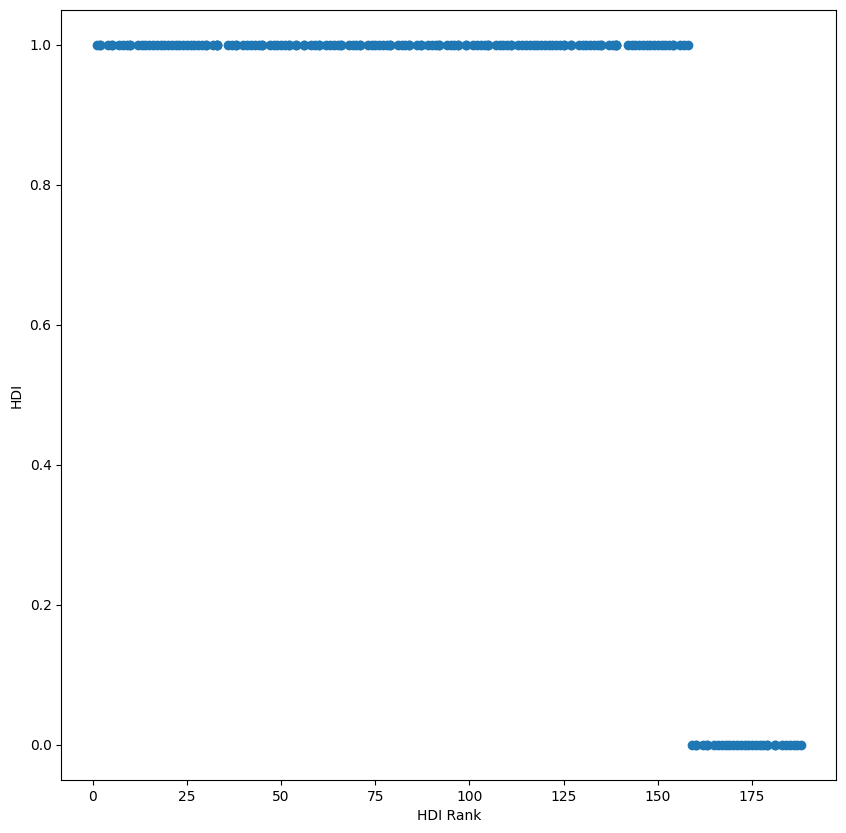

In [83]:
plt.figure(figsize=(10, 10))
plt.scatter(df["HDI Rank"], df["HDI"])
plt.xlabel("HDI Rank")
plt.ylabel("HDI")
plt.show()

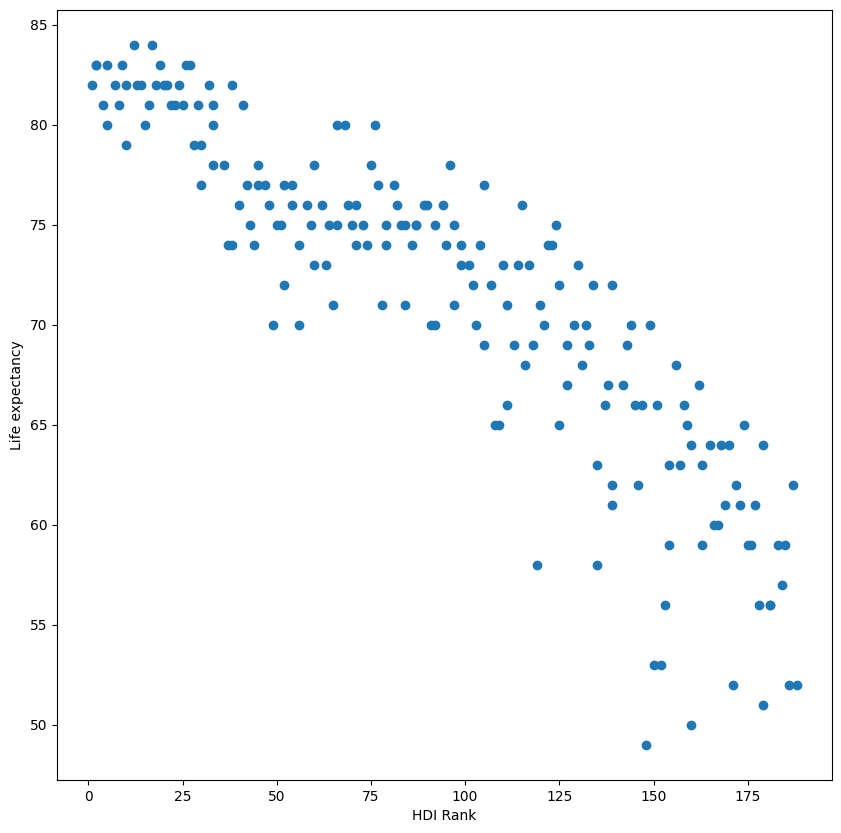

In [85]:
plt.figure(figsize=(10, 10))
plt.scatter(df["HDI Rank"], df["Life expectancy"])
plt.xlabel("HDI Rank")
plt.ylabel("Life expectancy")
plt.show()

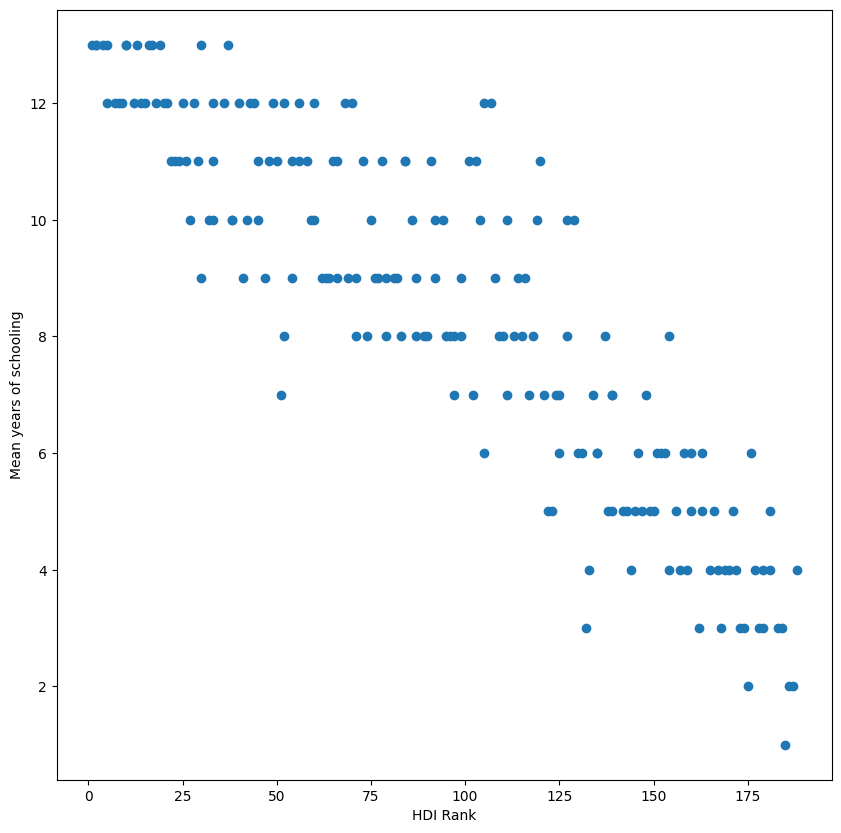

In [87]:
plt.figure(figsize=(10, 10))
plt.scatter(df["HDI Rank"], df["Mean years of schooling"])
plt.xlabel("HDI Rank")
plt.ylabel("Mean years of schooling")
plt.show()

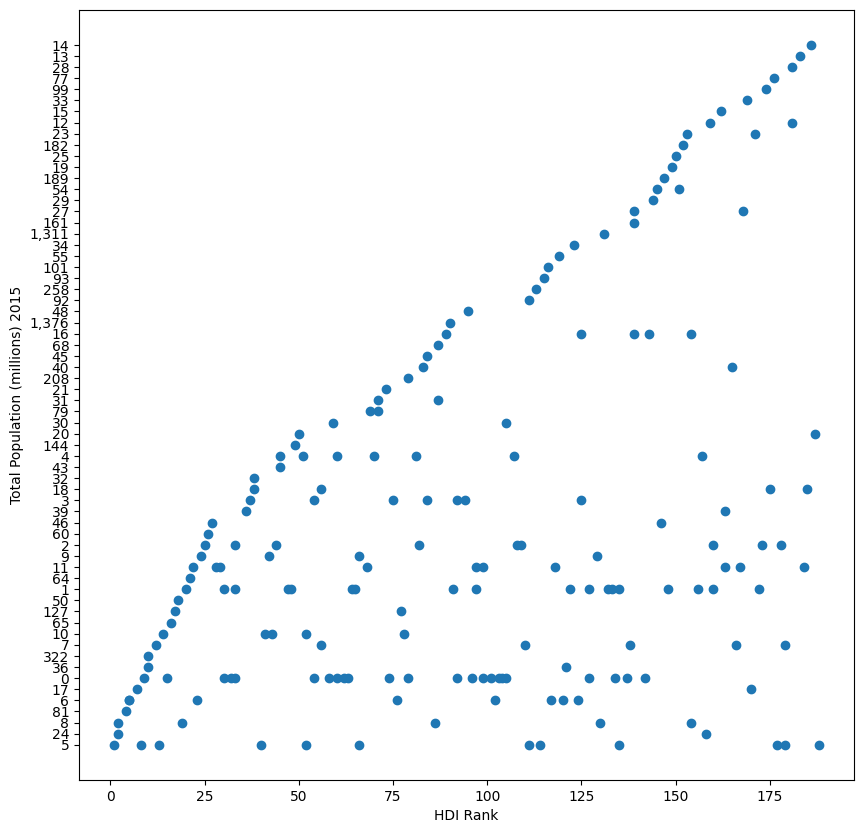

In [92]:
plt.figure(figsize=(10, 10))
plt.scatter(df["HDI Rank"], df["Total Population (millions) 2015"])
plt.xlabel("HDI Rank")
plt.ylabel("Total Population (millions) 2015")
plt.show()